<a href="https://colab.research.google.com/github/Sayan220/Movie_Genre/blob/main/genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Genre Prediction

In [ ]:
#importing the necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the data set
df=pd.read_csv('/content/Movie_combined.csv')

In [53]:
df.head()  #1st five rows

,Unnamed: 0,Title,Genre,Plot,Poster
0,0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,5,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,6,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...


In [ ]:
df.tail(20)  #last 20 rows

,Unnamed: 0,Title,Genre,Plot,Poster
17283,21202,a step into the darkness,drama,The film tells the tragic story of an Iraqi-Tu...,https://m.media-amazon.com/images/M/MV5BMTgzND...
17284,21203,how are you?,drama,"Semahat, whose parents emigrated to İstanbul f...",https://m.media-amazon.com/images/M/MV5BOTAzNT...
17285,21208,five minarets in new york,action,The film follows two anti-terror officers from...,https://m.media-amazon.com/images/M/MV5BMjE5OT...
17286,21209,jackal,drama,"The life of Akın, who lives in one of the poor...",https://m.media-amazon.com/images/M/MV5BYjZjMj...
17287,21210,secret of the sultan,action,An American professor travels to Istanbul to f...,https://m.media-amazon.com/images/M/MV5BMGE0Zj...
17288,21211,other angels,drama,Sanem (Didem Soylu) is a prostitute who shares...,https://m.media-amazon.com/images/M/MV5BMTQwNz...
17289,21212,hayde bre,drama,Şaban Agha (Şevket Emrulla) lives in a small M...,https://m.media-amazon.com/images/M/MV5BYjczMT...
17290,21213,eyyvah eyvah 2,comedy,"Hüseyin (Ata Demirer), a clarinetist from a vi...",https://m.media-amazon.com/images/M/MV5BMTY3MT...
17291,21214,free man,drama,Muslim Kurdish scholar Said Nursî passes throu...,https://m.media-amazon.com/images/M/MV5BOTY2Nz...
17292,21215,scapegoat,comedy,"Şahin K. is a wealthy and famous (or, rather, ...",https://m.media-amazon.com/images/M/MV5BMTgyND...


In [54]:
df.shape  #rows =17303  #columns = 5

(17303, 5)

In [55]:
movie_df=df[["Title","Genre","Plot"]]
movie_df

,Title,Genre,Plot
0,the great train robbery,action,The film opens with two bandits breaking into ...
1,the suburbanite,comedy,The film is about a family who move to the sub...
2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...
3,the adventures of dollie,drama,On a beautiful summer day a father and mother ...
4,the black viper,drama,A thug accosts a girl as she leaves her workpl...
...,...,...,...
17298,selam,drama,The film opens with a Senegalese boy named Kha...
17299,particle (film),drama,"Zeynep lost her job at weaving factory, and he..."
17300,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the..."
17301,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i..."


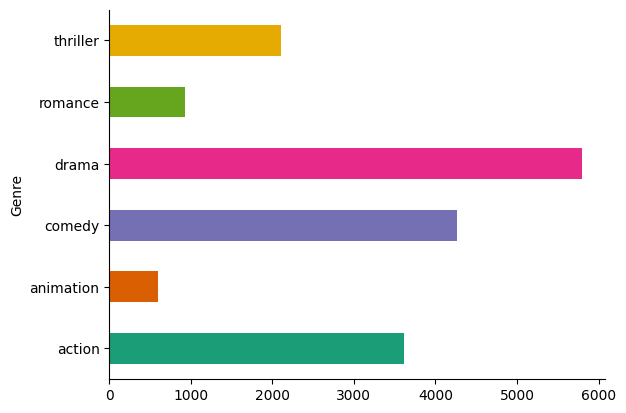

In [56]:
#Categorical distributions
movie_df.groupby('Genre').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17303 entries, 0 to 17302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   17303 non-null  object
 1   Genre   17303 non-null  object
 2   Plot    17303 non-null  object
dtypes: object(3)
memory usage: 405.7+ KB


In [ ]:
# check for null values in the dataset
print(movie_df.isnull().sum())

Title    0
Genre    0
Plot     0
dtype: int64


In [ ]:
movie_df[movie_df["Plot"].str.contains("The film opens")]

,Title,Genre,Plot
0,the great train robbery,action,The film opens with two bandits breaking into ...
6,the fight for freedom,action,The film opens in a town on the Mexican border...
68,civilization,drama,The film opens with the outbreak of a war in t...
93,a modern musketeer,action,The film opens with a sequence in which D'Arta...
126,the romance of tarzan,action,The film opens with flashbacks from Tarzan of ...
...,...,...,...
16973,heaven's lost property the movie: the angeloid...,animation,The film opens with Tomoki and the rest of the...
17074,corpse party,thriller,The film opens on a rainy night at Kisaragi Ac...
17188,battle for sevastopol,action,The film opens and closes with post-war scenes...
17224,"come rain, come shine",drama,The film opens with a 9-minute long take of a ...


In [ ]:
movie_df[movie_df["Plot"].str.contains("At night, a carnivorous")]

,Title,Genre,Plot
12652,prey,action,"At night, a carnivorous, shape-shifting alien ..."
12653,prey,action,"At night, a carnivorous, shape-shifting alien ..."
12654,prey,action,"At night, a carnivorous, shape-shifting alien ..."
12655,prey,action,"At night, a carnivorous, shape-shifting alien ..."
12656,prey,action,"At night, a carnivorous, shape-shifting alien ..."
12657,prey,action,"At night, a carnivorous, shape-shifting alien ..."
12658,prey,action,"At night, a carnivorous, shape-shifting alien ..."
12659,prey,action,"At night, a carnivorous, shape-shifting alien ..."
12660,prey,action,"At night, a carnivorous, shape-shifting alien ..."


In [ ]:
duplicate=movie_df.duplicated()  #identifying duplicate rows in the dataset
sum(duplicate)  #total number of duplicate rows

659

In [57]:
#Removing Duplicates
print("rows before: {}".format(movie_df.shape[0]))
movie_df=movie_df.drop_duplicates()
print("rows after: {}".format(movie_df.shape[0]))

rows before: 17303
rows after: 16644


In [58]:
movie_df[movie_df["Plot"].str.contains("At night, a carnivorous")]

,Title,Genre,Plot
12652,prey,action,"At night, a carnivorous, shape-shifting alien ..."


In [59]:
l1=set(movie_df["Genre"])
l1

{'action', 'animation', 'comedy', 'drama', 'romance', 'thriller'}

In [46]:
copy1=movie_df[["Title","Genre","Plot"]] #creating a copy of the dataset for backup
copy1

,Title,Genre,Plot
0,the great train robbery,action,The film opens with two bandits breaking into ...
1,the suburbanite,comedy,The film is about a family who move to the sub...
2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...
3,the adventures of dollie,drama,On a beautiful summer day a father and mother ...
4,the black viper,drama,A thug accosts a girl as she leaves her workpl...
...,...,...,...
17298,selam,drama,The film opens with a Senegalese boy named Kha...
17299,particle (film),drama,"Zeynep lost her job at weaving factory, and he..."
17300,çalgı çengi i̇kimiz,comedy,"Two musicians, Salih and Gürkan, described the..."
17301,olanlar oldu,comedy,"Zafer, a sailor living with his mother Döndü i..."
